In [1]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') ## R ggplot style
import numpy as np

# 1. sympy를 활용한 미분
- SymPy는 심볼릭 연산(symbolic operation)을 지원하기 위한 파이썬 패키지이다. 심볼릭 연산이란 사람이 연필로 계산하는 미분/적분과 동일한 형태의 연산을 말한다. 즉,  $x^2$ 의 미분 연산을 수행하면 그 결과가  $2x$ 란 형태로 출력된다. 딥 러닝(deep learning) 등에 많이 사용되는 파이썬의 theano 패키지나 tensorflow 패키지도 기울기 함수 계산을 위해 이러한 심볼릭 연산 기능을 갖추고 있다.

## (1) sympy 기초

In [2]:
import sympy

In [3]:
# Juypter 노트북에서 수학식의 LaTeX 표현을 위해 필요함
sympy.init_printing(use_latex='mathjax')

In [4]:
## latex 표현 중지
# sympy.init_printing(pretty_print=False)  

In [5]:
x = sympy.symbols('x')
x

x

In [6]:
f = x * sympy.exp(x)
f

   x
x⋅ℯ 

In [7]:
## 미분

f.diff(x)

   x    x
x⋅ℯ  + ℯ 

In [8]:
## 연산된 결과를 계산
## subs(old, new) : 기존 변수를 새로운 변수로 교체한다.

f.diff(x).subs(x, 2).evalf()

22.1671682967919

In [9]:
## 함수로 만들어서 계산
## lambdify : 수치 계산을 위한 람다 함수를 만들어준다.

x = sympy.symbols('x')
y = sympy.symbols('y')
f = x+y

func = sympy.lambdify((x, y), f, modules=['numpy'])
## (입력할 변수, 함수, 수치계산을 위한 모듈)

In [10]:
func(3, 10)

13

----------

In [11]:
## 지수함수 미분
## e^x를 미분하세요

In [12]:
# x = sympy.symbols('x')
# f = sympy.exp(x)
# f.diff(x)

In [13]:
## 합성함수의 미분
## xg(x) 미분를 x에 대해 미분해보세요
## sympy.Function 사용

In [14]:
# x = sympy.symbols('x')
# g = sympy.Function('g')

In [15]:
# sympy.diff(x*(g(x)), x)

------------

## (2) 편미분

In [16]:
## 편미분
## x^2 + xy + y^2를 y에 대해 미분하세요

In [17]:
#### 스터디원 코드 ####
x, y = sympy.symbols('x y')
f = x**2 + x*y + y**2

In [18]:
f.diff(y, 1)

x + 2⋅y

In [19]:
## 편미분
## x^2 + xy + y^2를 y에 대해 미분한 후, x에 대해 미분하세요


In [20]:
#### 스터디원 코드 ####
# x, y = sympy.symbols('x y')
# f = x**2 + x*y + y**2

In [21]:
## latex 표현 중지
sympy.init_printing(pretty_print=False)  

# 2. 경사하강법
- Gradient Descent
- Gradient Descent 방법은 다음과 같이 단순히 현재 위치에서의 기울기 값  $g(x_k)=\frac {df(x_k)}{dx}$  만을 이용한다.
- $x_{k+1}=x_k−αg(x_k)$



### - 실행 과정
- 임의의 시작점에서 gradient 계산 
- gradient 반대 방향으로 0.01 만큼 이동
- 현재 위치와 이동할 다음 위치 간의 편차 (거리)가 허용치보다 적을 경우 멈춘다.


### - 필요한 함수
- 편미분
- 그레디언트
- 스텝

In [22]:
## x^2 함수에 대해 경사하강법을 적용한다.

def convex_function(x):
    return x**2

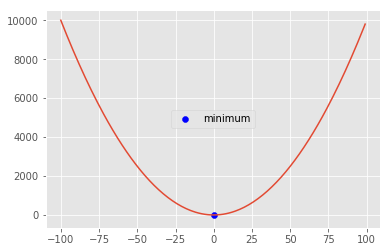

In [23]:
xs = [i for i in range(-100, 100)]
plt.plot(xs, [convex_function(i) for i in xs])
plt.scatter(0, 0, color = 'blue', label = 'minimum')
plt.legend(loc = 'center')
plt.show()

> ### (0, 0) 을 최솟값으로 갖는다. 경사하강법을 통해 이 점을 잘 찾아가는지 살펴보자.

In [24]:
## 편미분
## 변화율로 편미분값 근사

def partial_difference_quotient(f, v, i, h):
    """ 함수 f에서 v의 i번째 값의 편미분값"""
    if i > len(v):
        print('Value Error')
        
    else:
        v_j = v[i]
        w = v_j + h
        
        return (f(w) - f(v_j)) / h

In [25]:
## 그레디언트
## 각 위치의 편미분값들을 구한다.

def estimate_gradient(f, v, h=0.00001):
    return [partial_difference_quotient(f, v, i, h)  # 함수 f에 대해 어떤 위치 v에 대한 미분값 
            for i, _ in enumerate(v)]

In [26]:
v = np.linspace(-10, 10, num = 100) ## 정해진 범위 안에서 균등한 간격으로 n개의 유리수를 생성한다.

partial_difference_quotient(convex_function, v, 10, 0.0001)

-15.959495959521064

In [27]:
def step(v, direction, step_size):
    """ v 에서 step_size 만큼 이동"""

    return [v_i + step_size * direction_i
            for v_i, direction_i in zip(v, direction)]

In [28]:
def distance(v, w):
    import math
    v_arr = np.array(v)
    w_arr = np.array(w)
    vector_subtract = v_arr - w_arr
    sum_of_square = vector_subtract.dot(vector_subtract)
    dist = sum_of_square ** (1/2)
    return dist

In [29]:
import random
tolerance = 0.00001
v = [random.randint(-10, 10) for i in range(2)]
i = 0
print('initial point : ', v)
while True:
    i += 1
    gradient = estimate_gradient(convex_function, v) # 임의의 시작점에서 gradient 계산 
    next_v = step(v, gradient, -0.01)                # gradient 반대 방향으로 0.01 만큼 이동
    if distance(next_v, v) < tolerance:              # v와 next_v 간의 편차 (거리)가 허용치보다 적을 경우 멈춘다.
        break
    v = next_v
print('[%s 번째 시행] ' %str(i), '편차 :', distance(next_v, v), '최솟값 위치 : ', v)

initial point :  [9, 10]
[506 번째 시행]  편차 : 9.97786757557318e-06 최솟값 위치 :  [0.0003287420854874525, 0.00036582451882753394]


In [37]:
v

[0.0003287420854874525, 0.00036582451882753394]

In [38]:
next_v

[0.0003220672437777034, 0.00035840802845098327]

In [39]:
distance(v, next_v)

9.97786757557318e-06

> ### 잘 찾아가는지 확인해보자.

In [30]:
def gradient_descent_plot():
    result_arr = []
    tolerance = 0.00001
    starting_point = [random.randint(-10, 10) for i in range(2)]
    v = starting_point[:]

    while True:
        gradient = estimate_gradient(convex_function, v)
        next_v = step(v, gradient, -0.01)
        if distance(next_v, v) < tolerance:              
            break
        v = next_v
        result_arr.append([v[0], convex_function(v[0])]) # 움직임 저장
    print('시작위치 :', starting_point, '[%s 번 시행] ' %str(i))
    print('편차 :', distance(next_v, v), '최솟값 위치 : ', v)
    plt.scatter([x[0] for x in result_arr], [x[1] for x in result_arr])
    plt.show()

시작위치 : [-1, -4] [506 번 시행] 
편차 : 9.869829542530524e-06 최솟값 위치 :  [-0.00012468884142285044, -0.00048375716102777447]


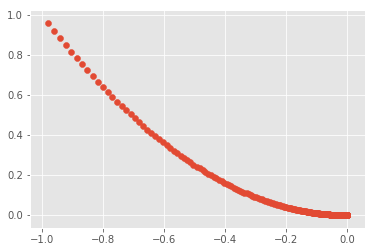

In [31]:
gradient_descent_plot()

## scipy 활용

In [32]:
from scipy import optimize

In [33]:
optimization = optimize.minimize(convex_function, random.randint(-100, 100), 
                                method='nelder-mead',    ## gradient를 알 수 없을 때 사용할 수 있는 방법
                                options={'xtol': 1e-8,   ## step size
                                    'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 37
         Function evaluations: 74


In [34]:
optimization

 final_simplex: (array([[ 5.68434189e-14],
       [-8.00931730e-09]]), array([3.23117427e-27, 6.41491636e-17]))
           fun: 3.2311742677852644e-27
       message: 'Optimization terminated successfully.'
          nfev: 74
           nit: 37
        status: 0
       success: True
             x: array([5.68434189e-14])

In [35]:
optimization.x

array([5.68434189e-14])

In [36]:
optimization.final_simplex

(array([[ 5.68434189e-14],
        [-8.00931730e-09]]), array([3.23117427e-27, 6.41491636e-17]))

## 참고자료
> - http://shuuki4.github.io/deep%20learning/2016/05/20/Gradient-Descent-Algorithm-Overview.html
> - https://www.slideshare.net/dahlmoon/jupyter-notebok-20160630